In [1]:
import datetime
print("latest edit:",datetime.datetime.now())

latest edit: 2025-07-21 18:40:47.003746


Get the data

Food-101-dataset

a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

In [2]:
# !pip install wget


In [ ]:
# import wget
# import zipfile

# # Download the zip file using Python wget
# url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
# wget.download(url, "pizza_steak.zip")  # this saves the file

# # Unzip the downloaded file
# with zipfile.ZipFile("pizza_steak.zip", "r") as zip_ref:
#     zip_ref.extractall()


Inspect the data

* A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A test directory with the same structure as the train directory.

Let's inspect each of the directories we've downloaded.

To so do, we can use the command ls which stands for list.


In [4]:
!dir pizza_steak

 Volume in drive D is New Volume
 Volume Serial Number is F40B-D59C

 Directory of d:\Data Science\TensorFlow-for-Deep-Learning\Computer Vision\pizza_steak

21-07-2025  18:41    <DIR>          .
21-07-2025  18:41    <DIR>          ..
21-07-2025  18:41    <DIR>          test
21-07-2025  18:41    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  321,290,481,664 bytes free


In [5]:
!dir pizza_steak\train\

 Volume in drive D is New Volume
 Volume Serial Number is F40B-D59C

 Directory of d:\Data Science\TensorFlow-for-Deep-Learning\Computer Vision\pizza_steak\train

21-07-2025  18:41    <DIR>          .
21-07-2025  18:41    <DIR>          ..
21-07-2025  18:41    <DIR>          pizza
21-07-2025  18:41    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  321,290,481,664 bytes free


In [6]:
!dir pizza_steak\test

 Volume in drive D is New Volume
 Volume Serial Number is F40B-D59C

 Directory of d:\Data Science\TensorFlow-for-Deep-Learning\Computer Vision\pizza_steak\test

21-07-2025  18:41    <DIR>          .
21-07-2025  18:41    <DIR>          ..
21-07-2025  18:41    <DIR>          pizza
21-07-2025  18:41    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  321,290,481,664 bytes free


In [7]:
!dir pizza_steak\test\steak

 Volume in drive D is New Volume
 Volume Serial Number is F40B-D59C

 Directory of d:\Data Science\TensorFlow-for-Deep-Learning\Computer Vision\pizza_steak\test\steak

21-07-2025  18:41    <DIR>          .
21-07-2025  18:41    <DIR>          ..
21-07-2025  18:41            49,452 100274.jpg
21-07-2025  18:41            68,761 1012080.jpg
21-07-2025  18:41            84,650 1016217.jpg
21-07-2025  18:41            54,239 1064847.jpg
21-07-2025  18:41            69,069 1082384.jpg
21-07-2025  18:41            35,181 108310.jpg
21-07-2025  18:41            43,561 1094883.jpg
21-07-2025  18:41            48,923 1107549.jpg
21-07-2025  18:41            33,209 1118585.jpg
21-07-2025  18:41            57,498 1163050.jpg
21-07-2025  18:41           116,242 1166047.jpg
21-07-2025  18:41            52,966 1190808.jpg
21-07-2025  18:41            23,999 1194662.jpg
21-07-2025  18:41            71,660 1206166.jpg
21-07-2025  18:41            44,133 1225389.jpg
21-07-2025  18:41            48,308 1

In [8]:
import os

# Use raw string (r"...") or forward slashes
num_steak_images_train = len(os.listdir(r"pizza_steak/train/steak"))
print("Number of steak images in training set:", num_steak_images_train)


Number of steak images in training set: 750


In [9]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# view an image 

import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    """
    Displays a random image from a target directory and class.
    
    Args:
    target_dir (str): Path to the target directory.
    target_class (str): Name of the target class.
    """
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.choice(os.listdir(target_folder))
    img = mpimg.imread(os.path.join(target_folder, random_image))
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    return img


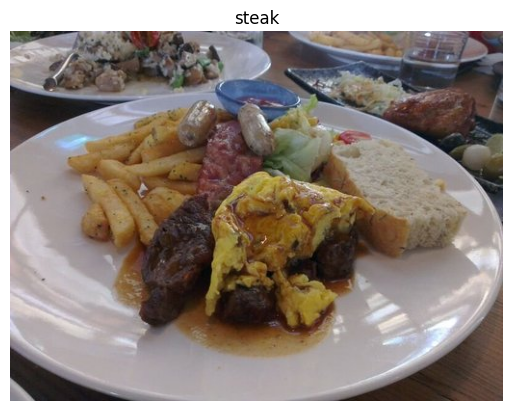

In [11]:
img=view_random_image("pizza_steak/train", "steak")

In [12]:
img

array([[[ 83,  85,  63],
        [108, 110,  88],
        [106, 110,  87],
        ...,
        [114,  94, 106],
        [115,  94, 109],
        [112,  91, 106]],

       [[ 65,  67,  45],
        [ 99, 101,  79],
        [121, 125, 102],
        ...,
        [111,  94, 104],
        [108,  90, 102],
        [104,  86,  98]],

       [[ 54,  58,  35],
        [ 74,  78,  55],
        [113, 117,  92],
        ...,
        [104,  92,  96],
        [101,  89,  93],
        [ 99,  87,  91]],

       ...,

       [[131, 129, 140],
        [132, 130, 141],
        [133, 131, 142],
        ...,
        [ 88,  71,  64],
        [ 83,  68,  61],
        [ 81,  66,  59]],

       [[131, 131, 141],
        [131, 131, 141],
        [131, 131, 141],
        ...,
        [ 91,  74,  67],
        [ 86,  71,  64],
        [ 84,  69,  62]],

       [[130, 130, 140],
        [131, 131, 141],
        [131, 131, 141],
        ...,
        [ 89,  72,  65],
        [ 85,  70,  63],
        [ 82,  67,  60]]

In [13]:
img.shape # return width,height,channels

(384, 512, 3)

Looking at the image shape more closely, see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

 As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [14]:
img/255.0

array([[[0.3254902 , 0.33333333, 0.24705882],
        [0.42352941, 0.43137255, 0.34509804],
        [0.41568627, 0.43137255, 0.34117647],
        ...,
        [0.44705882, 0.36862745, 0.41568627],
        [0.45098039, 0.36862745, 0.42745098],
        [0.43921569, 0.35686275, 0.41568627]],

       [[0.25490196, 0.2627451 , 0.17647059],
        [0.38823529, 0.39607843, 0.30980392],
        [0.4745098 , 0.49019608, 0.4       ],
        ...,
        [0.43529412, 0.36862745, 0.40784314],
        [0.42352941, 0.35294118, 0.4       ],
        [0.40784314, 0.3372549 , 0.38431373]],

       [[0.21176471, 0.22745098, 0.1372549 ],
        [0.29019608, 0.30588235, 0.21568627],
        [0.44313725, 0.45882353, 0.36078431],
        ...,
        [0.40784314, 0.36078431, 0.37647059],
        [0.39607843, 0.34901961, 0.36470588],
        [0.38823529, 0.34117647, 0.35686275]],

       ...,

       [[0.51372549, 0.50588235, 0.54901961],
        [0.51764706, 0.50980392, 0.55294118],
        [0.52156863, 0

Architecture of CNN

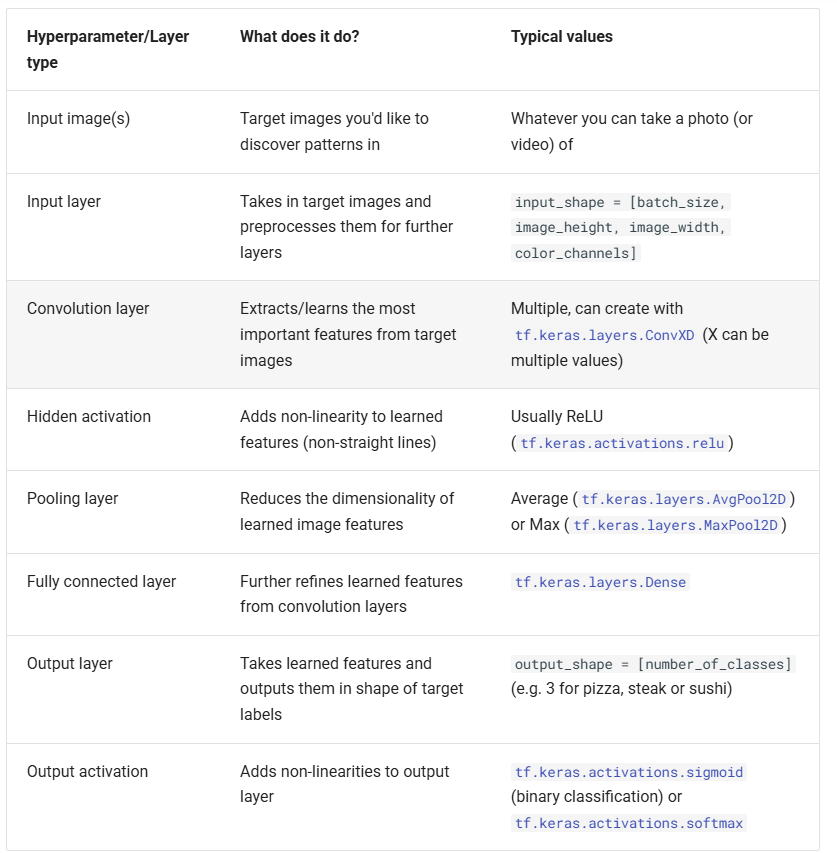

How the architecture looks like 

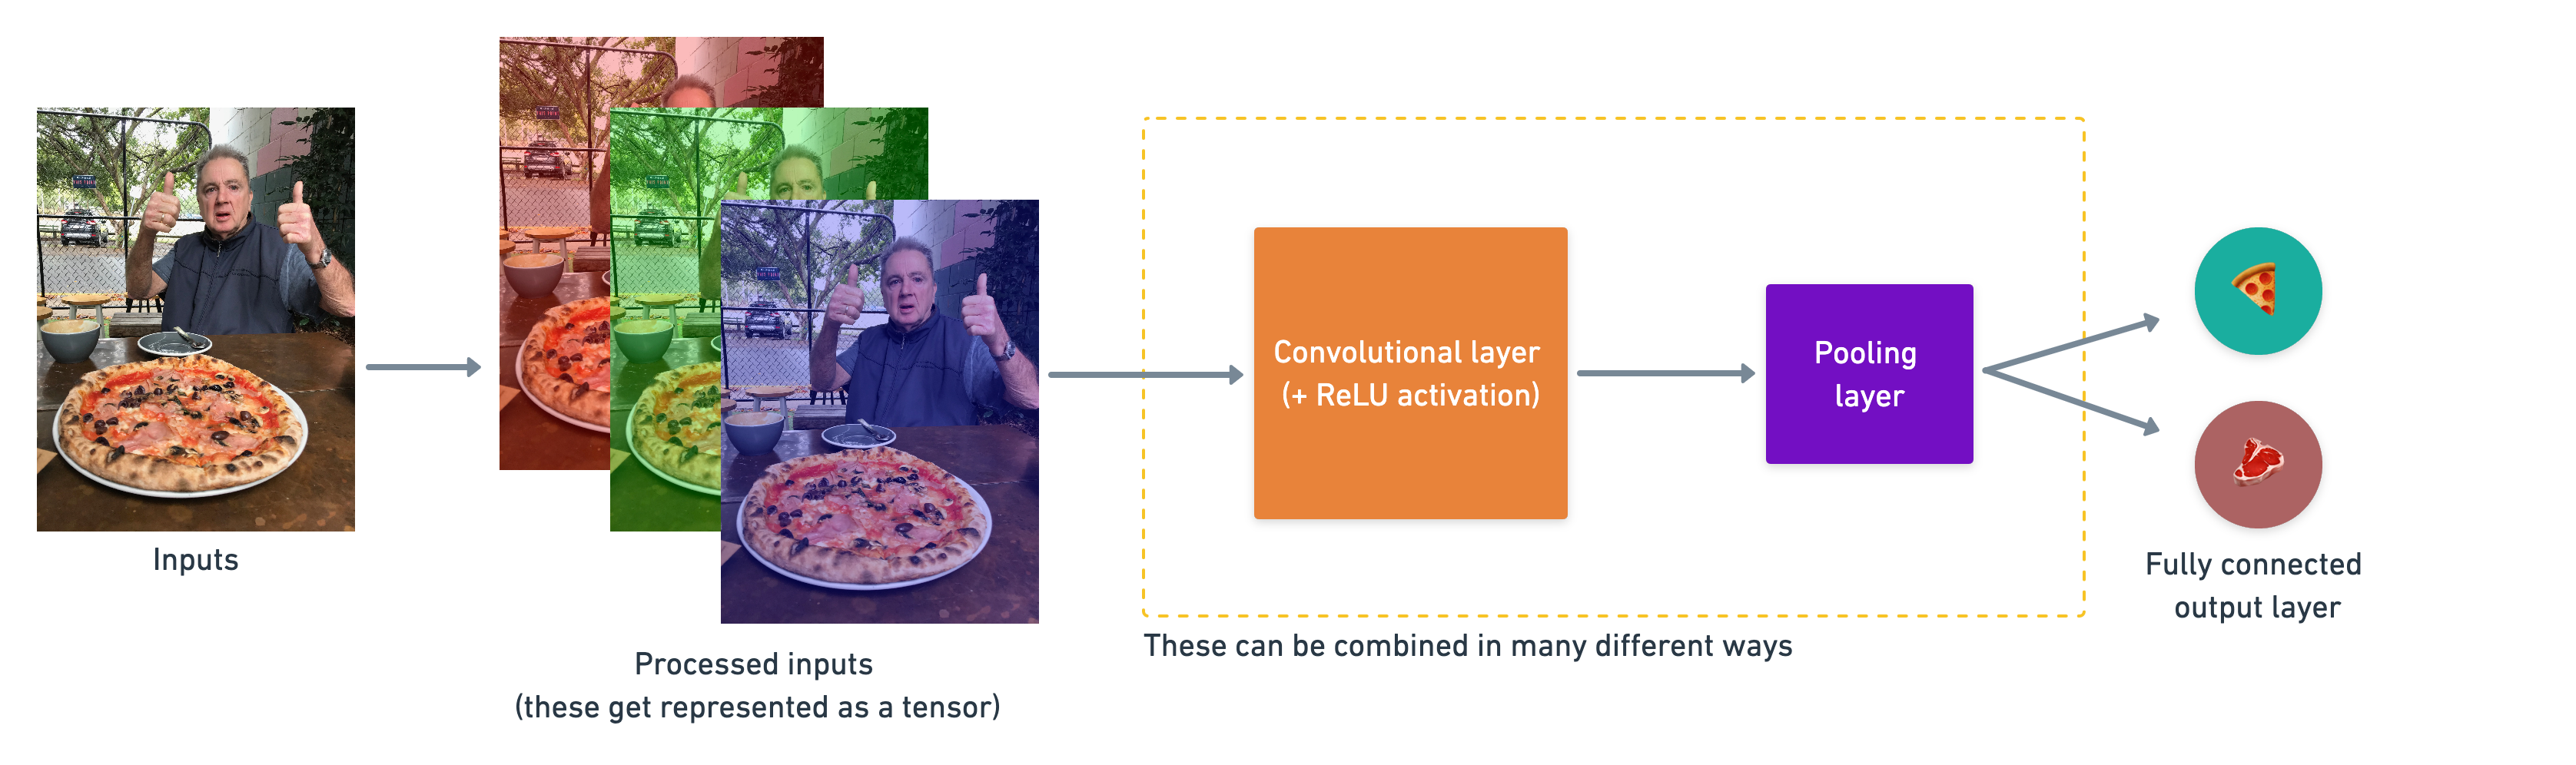

A baseline is a score or evaluation metric we want to try and beat. Usually we will start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 

tf.random.set_seed(42)

# preprocess the data(get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# setup the train and test directories

train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# import data from directories and turn it into batches

train_data=train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)

valid_data=valid_datagen.flow_from_directory(
    directory=test_dir, 
    batch_size=32,
    target_size=(224,224),  
    class_mode="binary",
    seed=42
)


# create a CNN model 

model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),   
                metrics=["Accuracy"])

history_1=model_1.fit(train_data,
                      steps_per_epoch=len(train_data),  
                      validation_data=valid_data,
                      validation_steps=len(valid_data),
                        epochs=5)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - Accuracy: 0.6776 - loss: 0.5899 - val_Accuracy: 0.7980 - val_loss: 0.4309
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - Accuracy: 0.8043 - loss: 0.4113 - val_Accuracy: 0.8100 - val_loss: 0.4262
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - Accuracy: 0.8252 - loss: 0.4105 - val_Accuracy: 0.8640 - val_loss: 0.3265
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - Accuracy: 0.8337 - loss: 0.3708 - val_Accuracy: 0.8480 - val_loss: 0.3255
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - Accuracy: 0.8670 - loss: 0.3399 - val_Accuracy: 0.8780 - val_loss: 0.2721


In [18]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

* The ImageDataGenerator class and the rescale parameter
* The flow_from_directory() method
  * The batch_size parameter
  * The target_size parameter
* Conv2D layers (and the parameters which come with them)
* MaxPool2D layers (and their parameters).
* The steps_per_epoch and validation_steps parameters in the fit() function

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5149 - loss: 1.0163 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5138 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5037 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5047 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [20]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

One of the most noticeable things here is the much larger number of parameters in model_2 versus model_1.

model_2 has 602,141 trainable parameters where as model_1 has only 31,101. And despite this difference, model_1 still far and large out performs model_2.

Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5086 - loss: 7.6556 - val_accuracy: 0.7400 - val_loss: 1.0471
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7155 - loss: 0.7809 - val_accuracy: 0.5720 - val_loss: 1.3762
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6521 - loss: 0.9575 - val_accuracy: 0.7480 - val_loss: 0.4942
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7207 - loss: 0.5911 - val_accuracy: 0.7500 - val_loss: 0.5066
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7764 - loss: 0.5098 - val_accuracy: 0.5860 - val_loss: 0.8664


Looks like our model is learning again. It got ~77% accuracy on the training set and ~60% accuracy on the validation set.

In [22]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

 the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

this goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

# Binary Classification

1. Import and become one with the data

In [23]:
# import wget
# import zipfile

# # Download the zip file using Python wget
# url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
# wget.download(url, "pizza_steak.zip")  # this saves the file

# # Unzip the downloaded file
# with zipfile.ZipFile("pizza_steak.zip", "r") as zip_ref:
#     zip_ref.extractall()


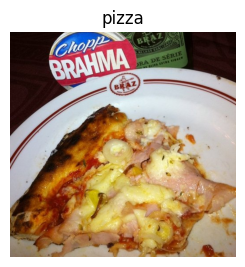

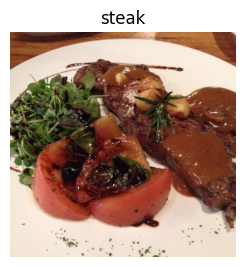

In [26]:
plt.figure()

plt.subplot(1,2,1)
imag=view_random_image("pizza_steak/train", "pizza")
plt.subplot(1,2,2)
imag=view_random_image("pizza_steak/train", "steak")

2. Preprocess the data

In [27]:
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [30]:
# turn the data into batches
# import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(
    directory=train_dir,    
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)

test_data=valid_datagen.flow_from_directory(
    directory=test_dir, 
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [33]:
images, labels = next(train_data)  # get the next batch of images and labels
len(images), len(labels)

(32, 32)

In [34]:
# get the first two images and labels
images[:2],labels[:2]

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [35]:
images[0].shape

(224, 224, 3)

In [36]:
labels


array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [37]:
len(labels)

32

3. Create a model

wondering about default model architecture? 

there is many possible answer to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).


 In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.




In [38]:
# make our model a little bit easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Flatten,MaxPool2D
from tensorflow.keras import Sequential

In [40]:
model_4=Sequential([
    Conv2D(
        filters=10, 
        kernel_size=3, 
        activation="relu", 
        padding="valid",  # padding is set to "valid" by default
        input_shape=(224, 224, 3)  # input shape for the first layer
    ),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2,padding="valid"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])   

4. Fit the model

steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [42]:
len(train_data), len(test_data)

(47, 16)

In [45]:
history_4=model_4.fit(train_data,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                    validation_steps=len(test_data),
                    epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.6799 - loss: 0.5804 - val_accuracy: 0.7760 - val_loss: 0.5015
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7726 - loss: 0.4914 - val_accuracy: 0.7980 - val_loss: 0.4699
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8071 - loss: 0.4190 - val_accuracy: 0.8180 - val_loss: 0.4397
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.8670 - loss: 0.3328 - val_accuracy: 0.8240 - val_loss: 0.4193
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8808 - loss: 0.3071 - val_accuracy: 0.8420 - val_loss: 0.4105


5. Evaluate the model

<Axes: >

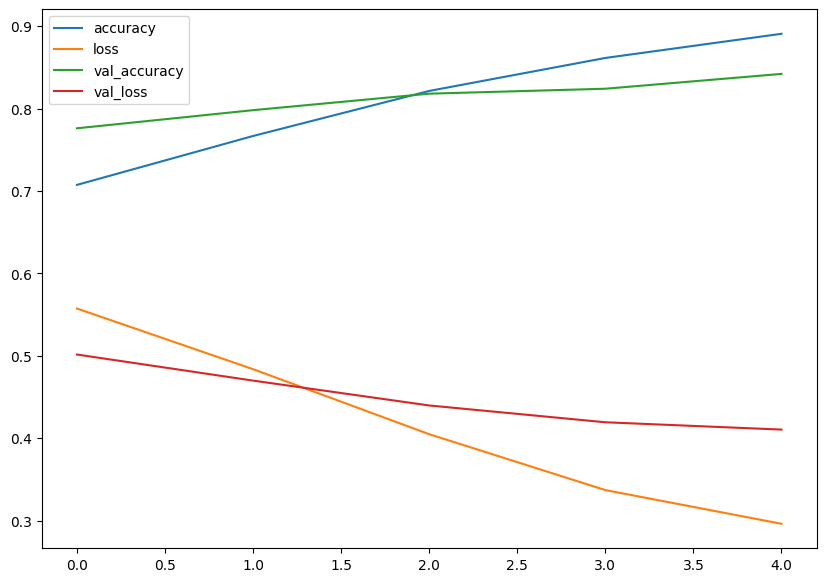

In [48]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [49]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

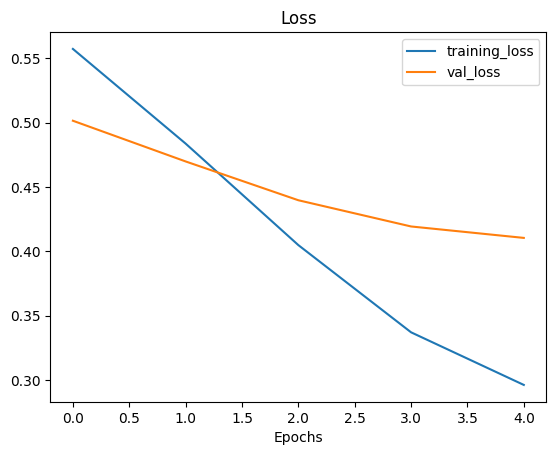

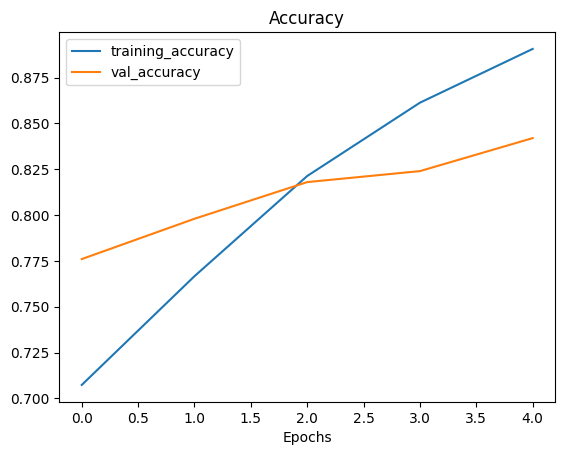

In [50]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [51]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 121000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │       121,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366,575 (1.40 MB)

 Trainable params: 122,191 (477.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244,384 (954.63 KB)

6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps: 0. Create a basline.

1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

In [52]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [54]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.5365 - loss: 0.6815 - val_accuracy: 0.7120 - val_loss: 0.5674
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.7101 - loss: 0.5802 - val_accuracy: 0.7860 - val_loss: 0.4361
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.7866 - loss: 0.4406 - val_accuracy: 0.8440 - val_loss: 0.3597
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8499 - loss: 0.3778 - val_accuracy: 0.8300 - val_loss: 0.3988
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8246 - loss: 0.3906 - val_accuracy: 0.8540 - val_loss: 0.3248


In [55]:
# Check out the model architecture
model_5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

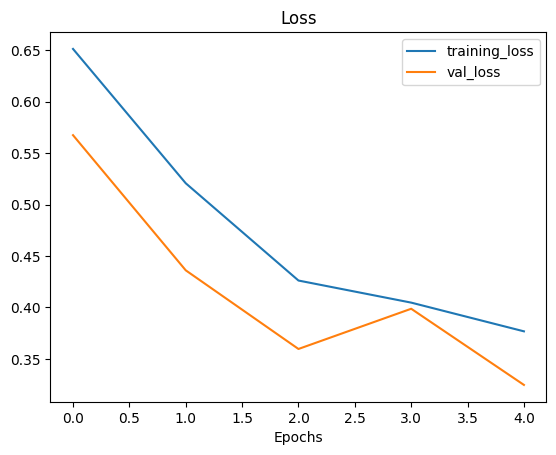

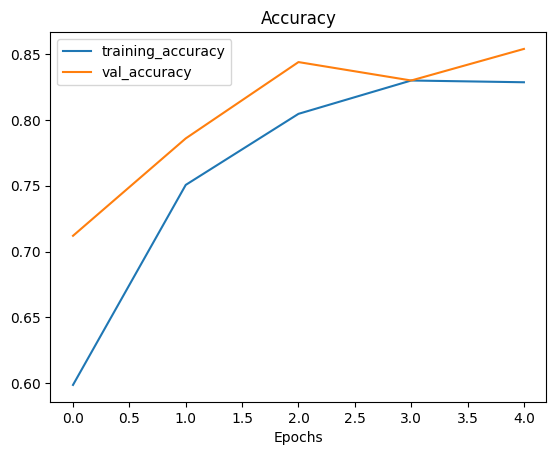

In [56]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [57]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [58]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [60]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # Note: labels aren't augmented, they stay the same

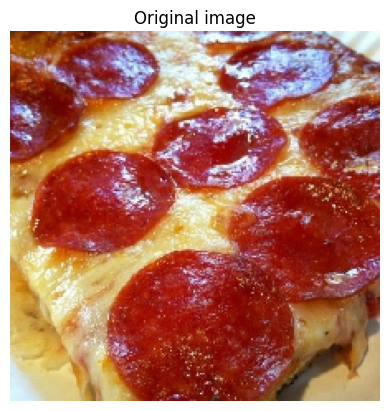

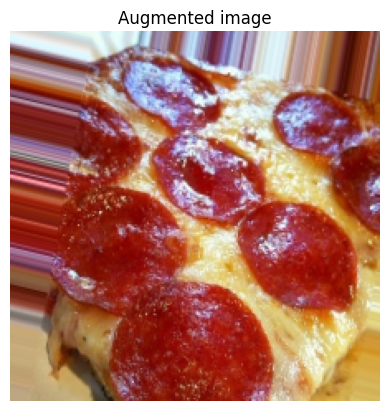

In [61]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [62]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.4308 - loss: 0.7746 - val_accuracy: 0.5040 - val_loss: 0.6865
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.4865 - loss: 0.6935 - val_accuracy: 0.6520 - val_loss: 0.6780
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.6031 - loss: 0.6857 - val_accuracy: 0.5740 - val_loss: 0.6538
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.5741 - loss: 0.6733 - val_accuracy: 0.5640 - val_loss: 0.6310
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.5672 - loss: 0.6471 - val_accuracy: 0.8020 - val_loss: 0.5373


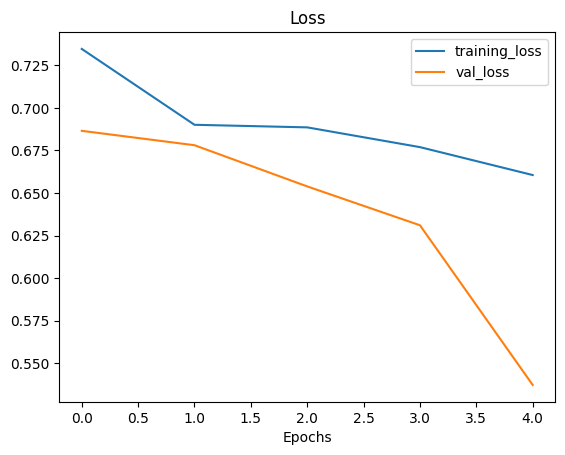

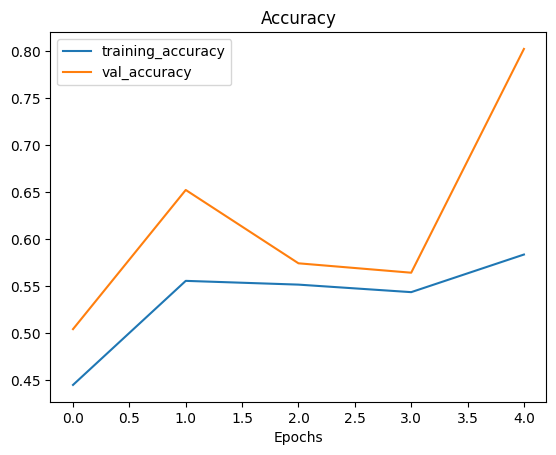

In [63]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

what happens when we shuffle the augmented training data.

In [64]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [65]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.6089 - loss: 0.6622 - val_accuracy: 0.7800 - val_loss: 0.4859
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.7439 - loss: 0.5513 - val_accuracy: 0.6820 - val_loss: 0.5402
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.7378 - loss: 0.5039 - val_accuracy: 0.8360 - val_loss: 0.3708
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.7543 - loss: 0.5209 - val_accuracy: 0.8020 - val_loss: 0.4165
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.7699 - loss: 0.5007 - val_accuracy: 0.8480 - val_loss: 0.3768


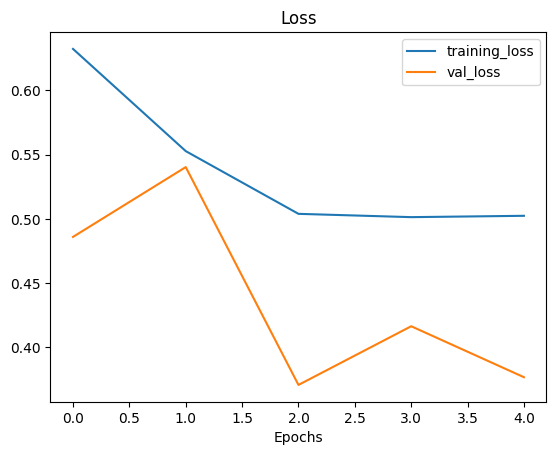

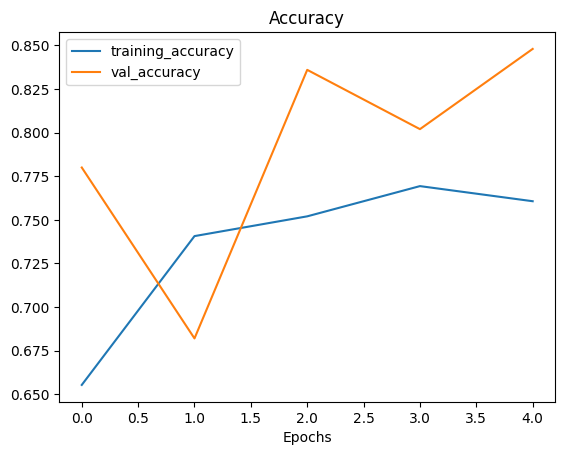

In [66]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [67]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - accuracy: 0.5628 - loss: 0.6837 - val_accuracy: 0.6720 - val_loss: 0.5811
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.6856 - loss: 0.5960 - val_accuracy: 0.7860 - val_loss: 0.4597
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.7315 - loss: 0.5442 - val_accuracy: 0.8400 - val_loss: 0.3677
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.7743 - loss: 0.4914 - val_accuracy: 0.8260 - val_loss: 0.3702
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.7780 - loss: 0.4855 - val_accuracy: 0.8520 - val_loss: 0.3532


In [68]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [69]:
# Check model_1 architecture (same as model_8)
model_8.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

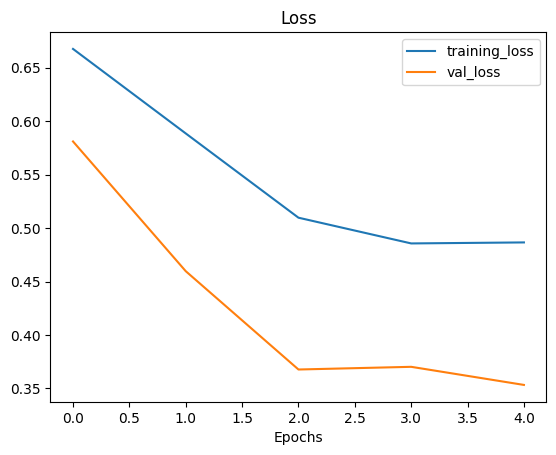

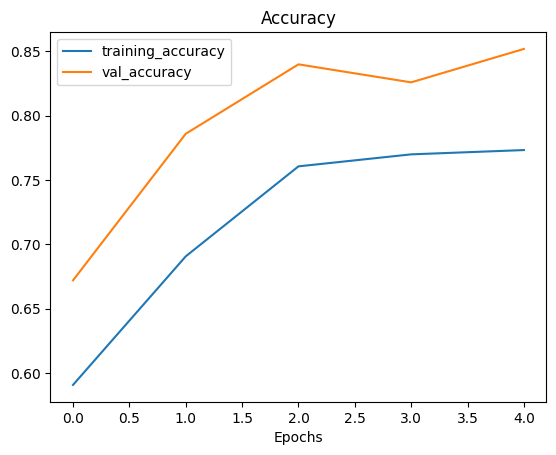

In [70]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

# Multi-class Classification

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

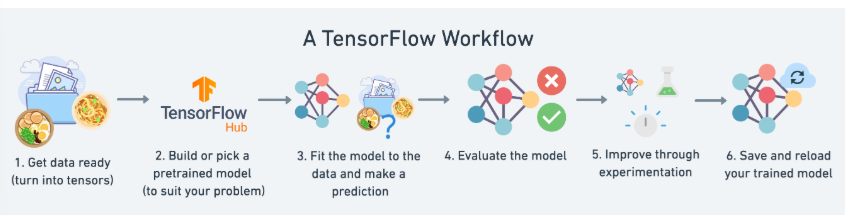

1. Import and become one with the data

In [78]:
import wget
import zipfile

# Download the zip file using Python wget
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
wget.download(url, "10_food_classes_all_data.zip")  # this saves the file

# Unzip the downloaded file
with zipfile.ZipFile("10_food_classes_all_data.zip", "r") as zip_ref:
     zip_ref.extractall()


In [79]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [80]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [81]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


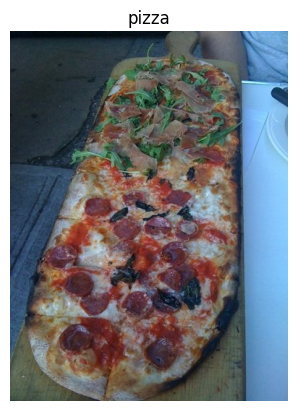

In [82]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

2. Preprocess the data

In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


3. Create a model

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Fit a model

In [85]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.1920 - loss: 2.1764 - val_accuracy: 0.2736 - val_loss: 2.0273
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.3251 - loss: 1.9360 - val_accuracy: 0.3152 - val_loss: 1.9886
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.4050 - loss: 1.7537 - val_accuracy: 0.3404 - val_loss: 1.9075
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.5416 - loss: 1.3626 - val_accuracy: 0.3288 - val_loss: 2.0428
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.7863 - loss: 0.7012 - val_accuracy: 0.3052 - val_loss: 2.4995


5. Evaluate a model

In [86]:
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.2988 - loss: 2.5526


[2.4994688034057617, 0.3052000105381012]

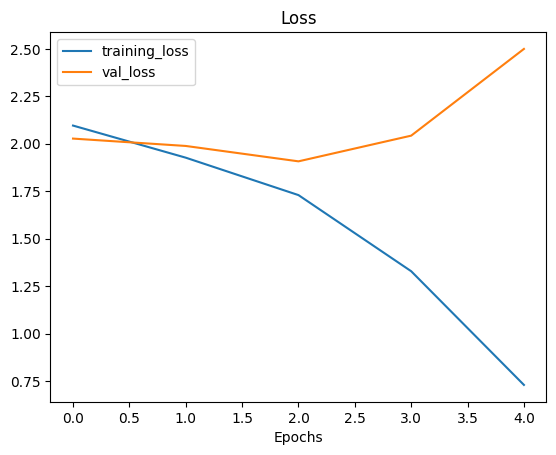

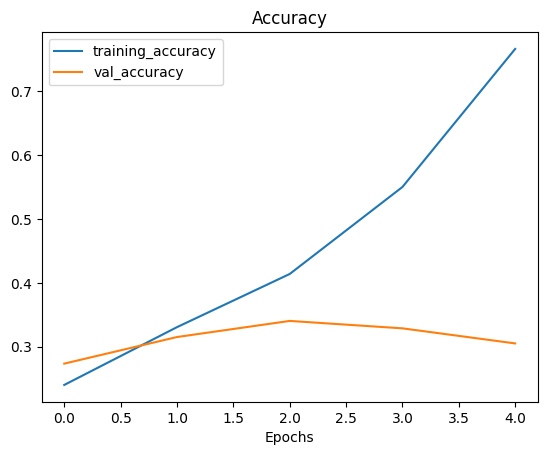

In [88]:
plot_loss_curves(history_9)

6. Adjust the model parameters

In [89]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - accuracy: 0.2029 - loss: 2.2307 - val_accuracy: 0.3216 - val_loss: 1.9305
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - accuracy: 0.3866 - loss: 1.7787 - val_accuracy: 0.3088 - val_loss: 1.9941
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - accuracy: 0.5341 - loss: 1.4240 - val_accuracy: 0.3336 - val_loss: 1.9372
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - accuracy: 0.7131 - loss: 0.9464 - val_accuracy: 0.3012 - val_loss: 2.2681
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - accuracy: 0.8501 - loss: 0.5724 - val_accuracy: 0.2880 - val_loss: 2.7686


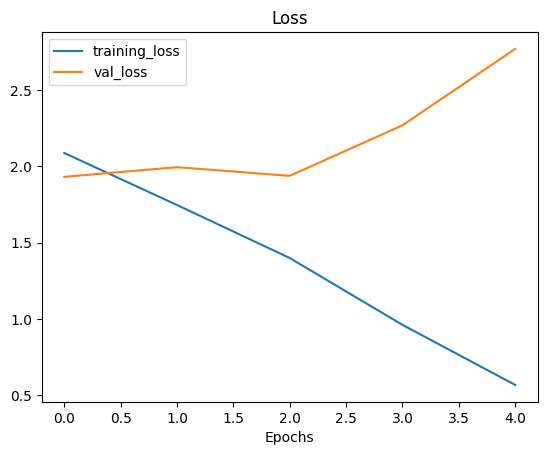

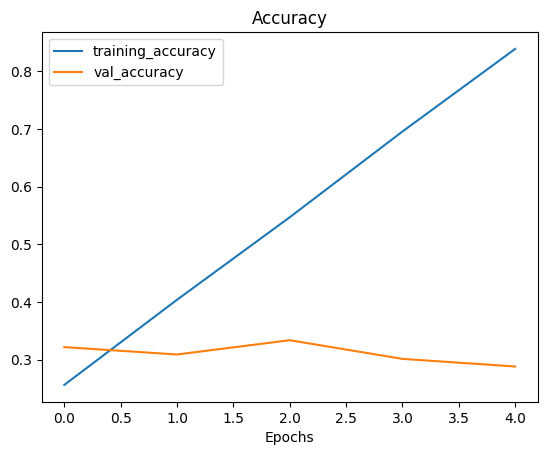

In [90]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

Data Augmentation

In [91]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [92]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

c:\Users\MAURY\miniconda3\envs\tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 346ms/step - accuracy: 0.1548 - loss: 2.3397 - val_accuracy: 0.2992 - val_loss: 2.0096
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 116s 492ms/step - accuracy: 0.2647 - loss: 2.0605 - val_accuracy: 0.3264 - val_loss: 1.9228
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 378ms/step - accuracy: 0.2849 - loss: 2.0364 - val_accuracy: 0.3324 - val_loss: 1.9084
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 177s 752ms/step - accuracy: 0.3033 - loss: 2.0058 - val_accuracy: 0.3084 - val_loss: 1.9594
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 399ms/step - accuracy: 0.3198 - loss: 1.9529 - val_accuracy: 0.3572 - val_loss: 1.8674


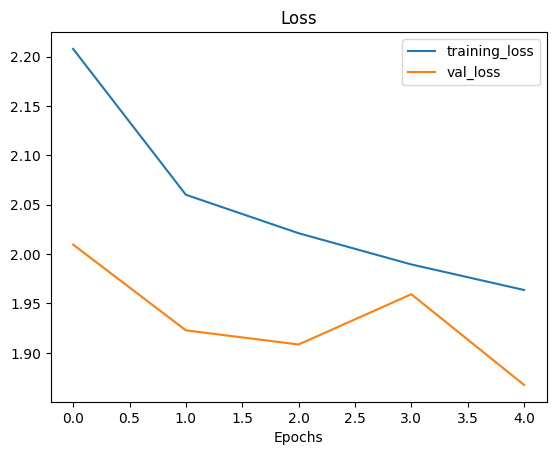

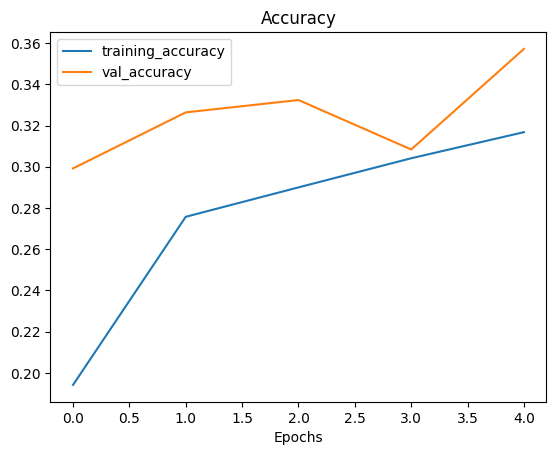

In [93]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

Saving and loading our model

In [96]:
model_11.save("save_trained_model.h5") # save the model

In [98]:
# load the model
loaded_model=tf.keras.models.load_model("save_trained_model.h5")

In [99]:
loaded_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,802 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [100]:
loaded_model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.3501 - loss: 1.8742


[1.8674476146697998, 0.3571999967098236]